<center>

# **VISUALIZATIONS SENTIMENT ANALYSIS**

</center>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the data columns types
dtypes = {
    "tweet_id": "object",
    "tweet_text":"str",
    "tweet_possibly_sensitive": "bool",
    "tweet_text": "str",
    "tweet_source": "object",
    "tweet_lang": "str",
    "tweet_retweet_count": "object",
    "tweet_reply_count":"object",
    "tweet_like_count": "object",
    "tweet_quote_count": "object",
    "tweet_impression_count": "object",
    "user_id":"object",
    "user_username": "object",
    "user_verified":"object",
    "user_protected":"object",
    "user_description":"str",
    "user_profile_image_url":"float",
    "user_location":"float",
    "user_followers_count":"float",
    "user_friends_count":"float",
    "user_tweet_count":"float",
    "place_id":"object",
    "place_name": "object",
    "place_full_name":"object",
    "place_country":"object",
    "place_country_code":"object",
    "place_type":"object",
    "clean_text":"str"
}

## Separate periods

Se can upload the separate files to create the histograms for each period.

In [ ]:
#Set path for files
files_path        = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Data/'

In [ ]:
wildfire_name = 'Tubbs'
output_name2  = '5.SA_Tubbs_tweets.csv'

In [ ]:
# Load the CSV file into a Pandas DataFrame
df2 = pd.read_csv(os.path.join(files_path, output_name2),dtype=dtypes)
print(df2.shape)

(90759, 30)


In [ ]:
df_concatenated = df2

## **Figure 1. Bar Plot**

In [ ]:
def sentiment_values(df_sentiment):
  Total_tweets  = df_sentiment.shape[0]
  pos_count     = sum(df_sentiment['sentiment'] > 0)/Total_tweets
  neg_count     = sum(df_sentiment['sentiment'] < 0)/Total_tweets
  neutral_count = len(df_sentiment[df_sentiment['sentiment'] ==0])/Total_tweets
  sentiment_counts = {'Positive': pos_count, 'Negative': neg_count, 'Neutral': neutral_count}
  return sentiment_counts

## 1. Separate periods

In [ ]:
possitive_sentiments= df_concatenated[df_concatenated["sentiment"]<0]

files_path= '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/NegativeMessages.xlsx'
possitive_sentiments["tweet_text"].to_excel(files_path, index=False)


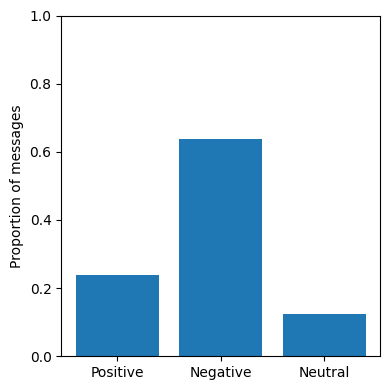

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get the data for the specified file_name
file_data = data[file_name]

# Extract the labels and values
labels = list(file_data.keys())
values = list(file_data.values())

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the bar plot for the current file
ax.bar(labels, values)

# Set the title and labels for the plot
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Proportion of messages')

# Set the y-axis limit to 1
ax.set_ylim(0, 1)

# Adjust the spacing
plt.tight_layout()

# Show the plot
plt.show()

##save figures
figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
figure_name = 'SA_'+ wildfire_name

# Save the figure as a PDF
output_file = os.path.join(figure_path,figure_name)
plt.savefig(output_file,format='pdf')


# Show the plot
plt.show()


## **Figure 3. Time line**

In [ ]:
df_sentiment = df2

In [ ]:
#  convert tweet_created_at to datetime format
df_sentiment['tweet_created_at'] = pd.to_datetime(df_sentiment['tweet_created_at'])

In [ ]:
# Assuming df_sentiment is your DataFrame
rows_with_nan = df_sentiment[pd.isnull(df_sentiment['sentiment'])]

In [ ]:
# Filter the dataframe to keep only negative sentiment values
#negative_sentiment = df_sentiment[df_sentiment['sentiment'] < 0]

negative_sentiment = df_sentiment

# Create a new dataframe with tweet_created_at and sentiment columns
sentiment_over_time = negative_sentiment[['tweet_created_at', 'sentiment']]

In [ ]:
sentiment_over_time

In [ ]:
# group the data by date and calculate the average sentiment score for each day
neg_sentiment_by_date = sentiment_over_time.groupby(pd.Grouper(key='tweet_created_at', freq='2D'))['sentiment'].mean()

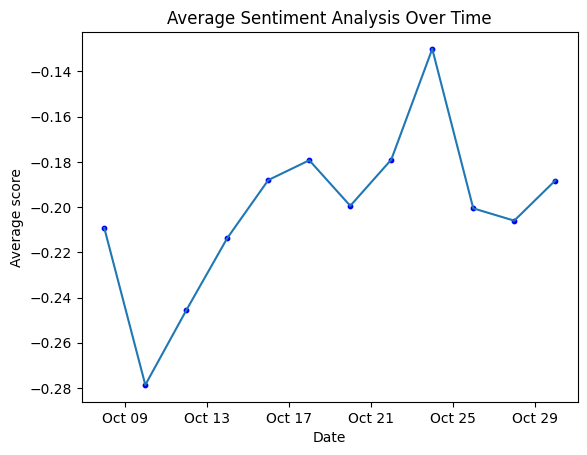

In [ ]:
# plot the line chart
plt.plot(neg_sentiment_by_date.index, neg_sentiment_by_date.values)
plt.title('Average Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average score')

# Format x-axis dates as abbreviated month and day
date_formatter = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_formatter)

# Add circles for the values on each date
plt.scatter(neg_sentiment_by_date.index, neg_sentiment_by_date.values, color='blue', s=10, label='Data Points')


plt.xticks(rotation=0)

##save figures
figure_path = '/content/drive/MyDrive/Mental_Health_Wildfire/Twitter_Data/Tubbs_Codes/Figures/'
figure_name = 'SA_'+ wildfire_name+'_overtime'


# Save the figure as a PDF
output_file = os.path.join(figure_path,figure_name)
plt.savefig(output_file,format='pdf')
plt.show()